In [105]:
import pandas as pd
import numpy as np

In [34]:
car_data = pd.read_csv('car data.csv')

In [35]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Checking the unique values in the categorical variables

In [36]:
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())
print(car_data['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


## Checking for Missing or Null values

In [37]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [40]:
final_data = car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [41]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Feature Engineering

In [42]:
final_data['Current_Year'] = 2020

In [44]:
final_data['# of Years'] = final_data['Current_Year'] - final_data['Year']

In [46]:
final_data.drop(['Year'], axis=1, inplace= True)
final_data.drop(['Current_Year'], axis=1, inplace=True)

In [48]:
final_data = pd.get_dummies(final_data, drop_first = True)

In [49]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,# of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [50]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,# of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
# of Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

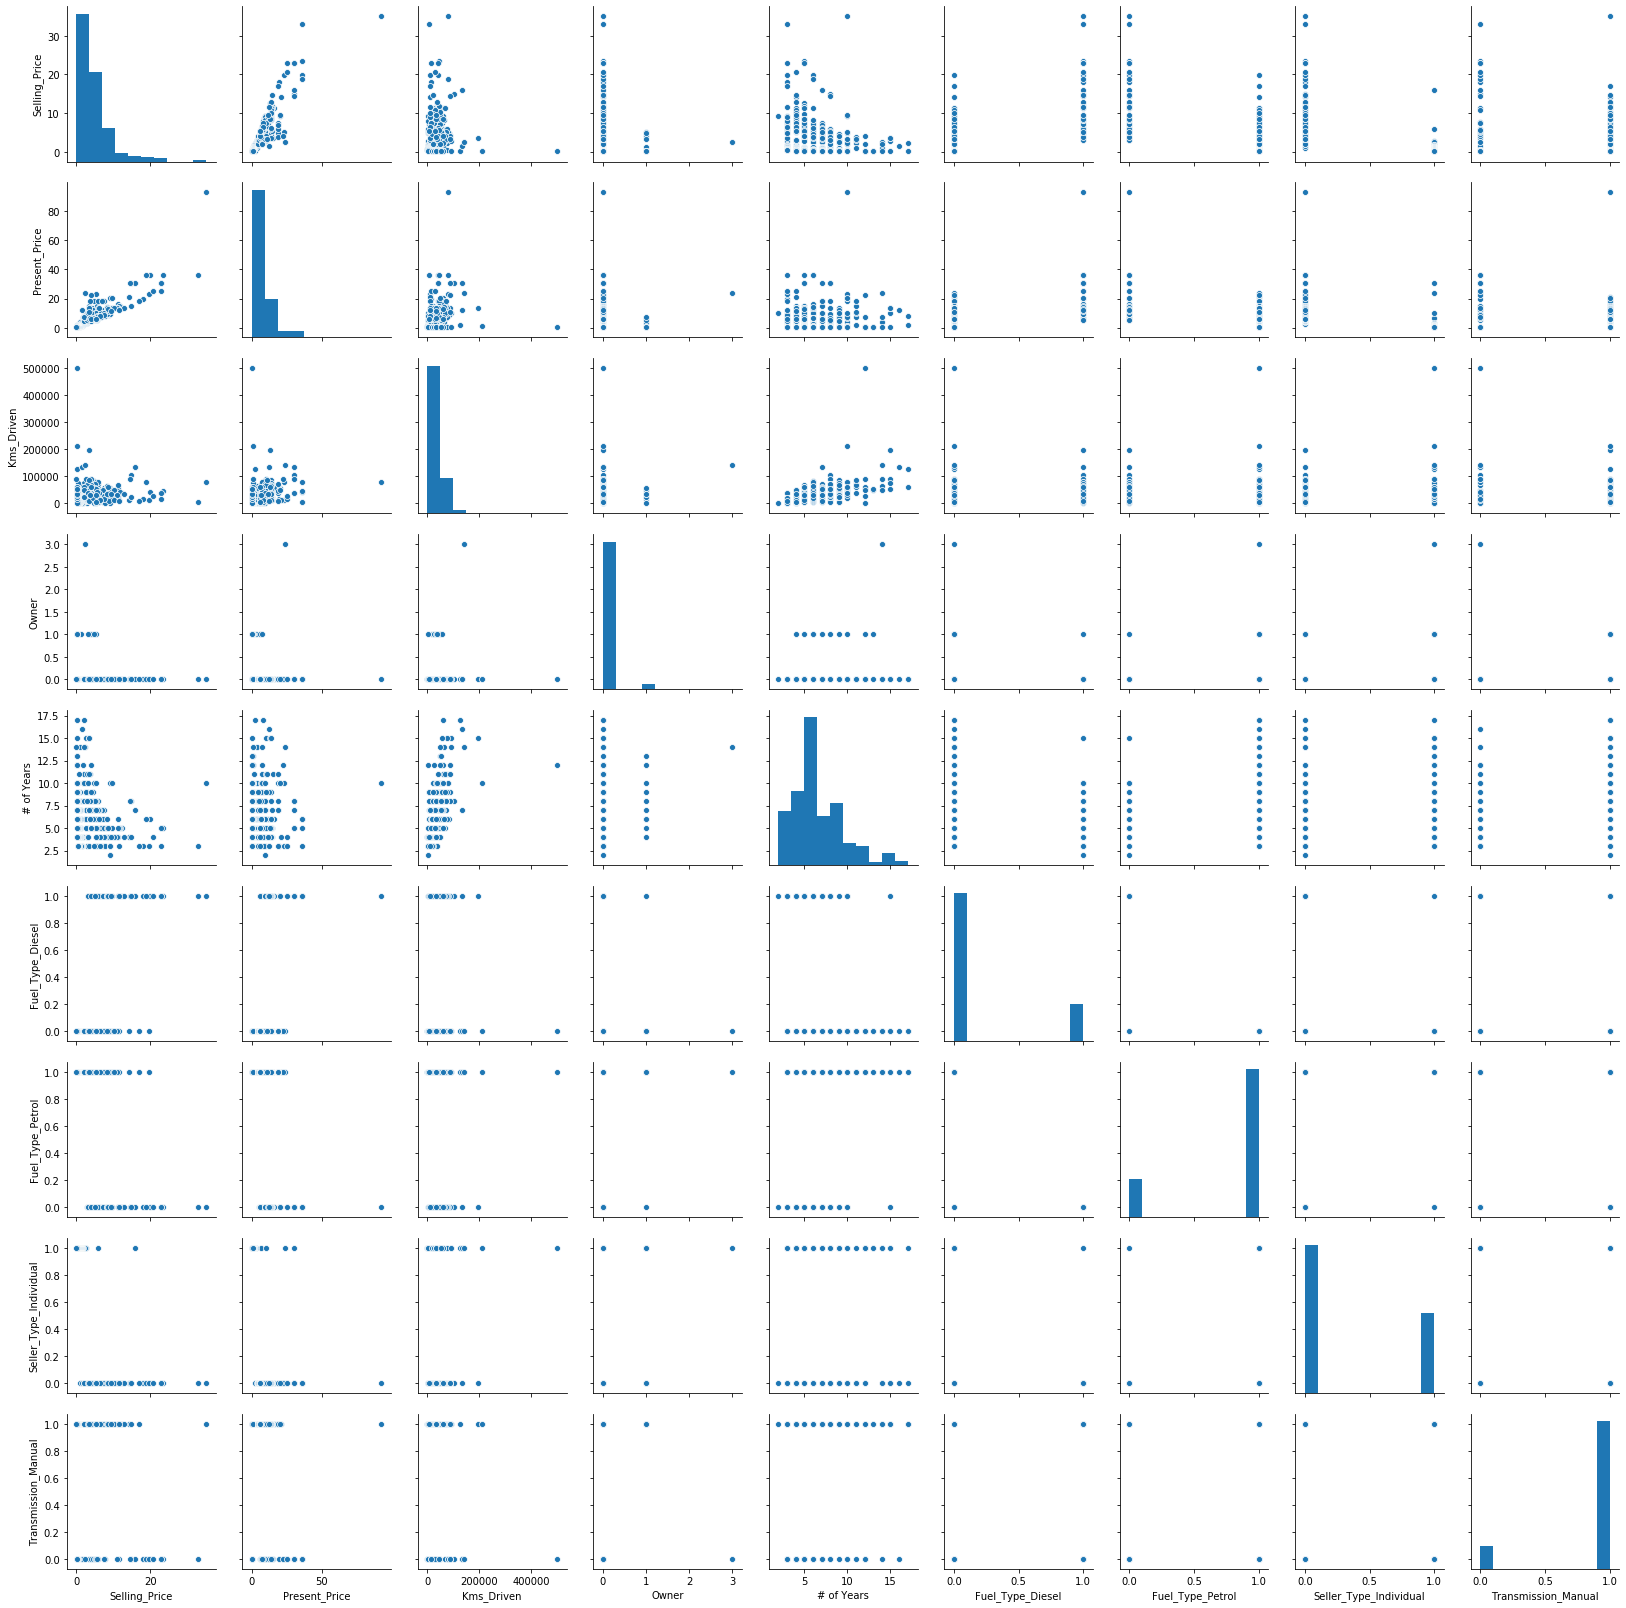

In [52]:
sns.pairplot(final_data)

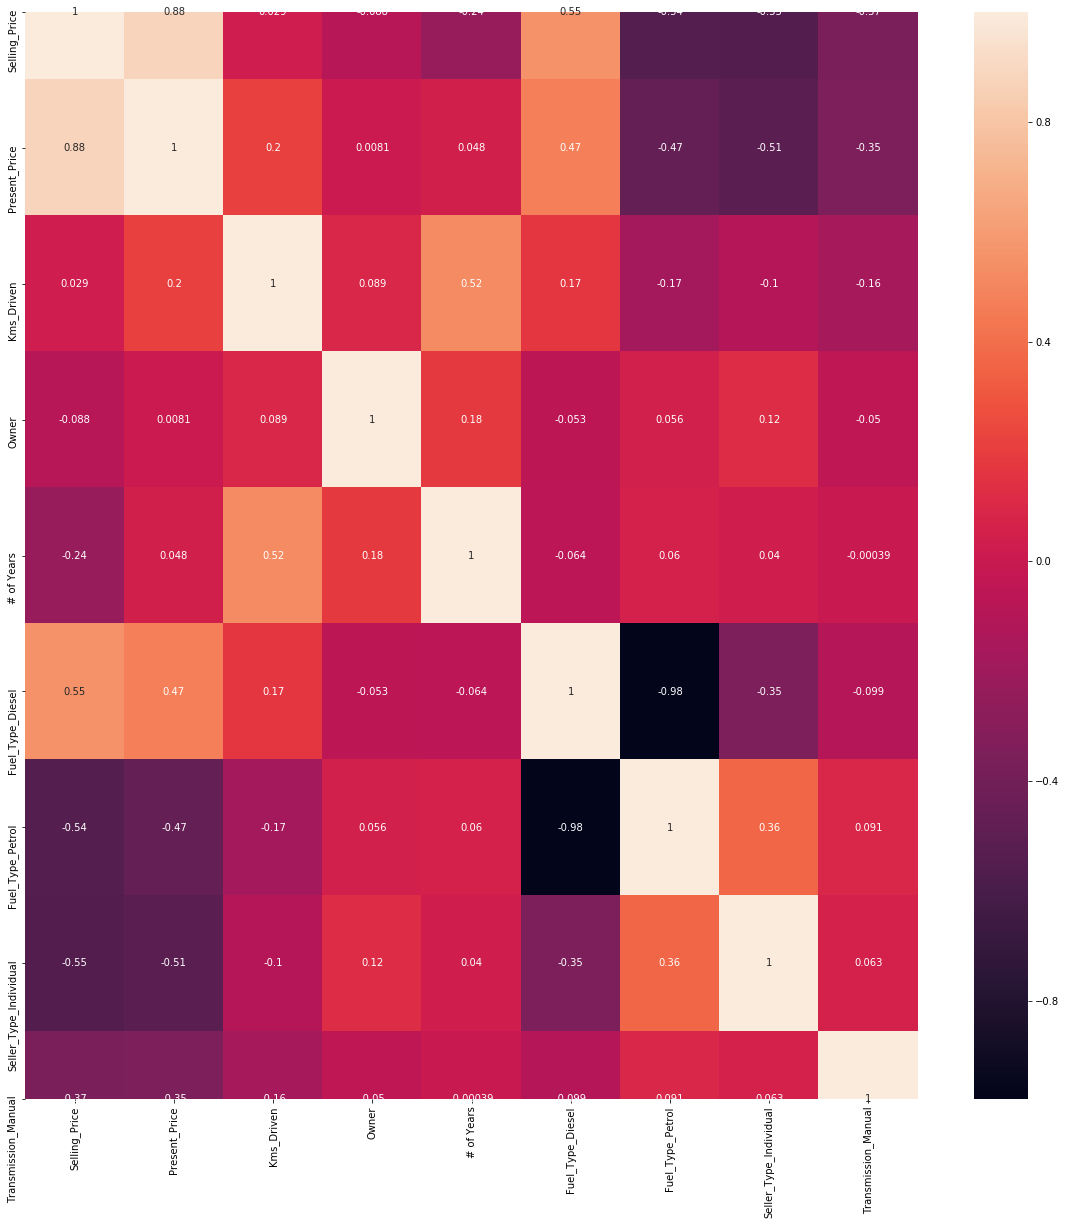

In [80]:
corr = final_data.corr()
top_corr_features = corr.index
plt.figure(figsize = (20,20))
HM = sns.heatmap(final_data[top_corr_features].corr(),annot=True)

In [81]:
X = final_data.iloc[:,1:]
Y = final_data.iloc[:,0]

In [85]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [86]:
print(model.feature_importances_)

[0.38647383 0.04261661 0.00128322 0.0743495  0.22008116 0.01334562
 0.12129156 0.1405585 ]


In [99]:
feature_importance = pd.DataFrame(model.feature_importances_, ['Present_Price', 'Kms_Driven', 'Owner', '# of Years','Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],['Weightage'])

In [102]:
feature_importance

,Weightage
Present_Price,0.386474
Kms_Driven,0.042617
Owner,0.001283
# of Years,0.074350
Fuel_Type_Diesel,0.220081
Fuel_Type_Petrol,0.013346
Seller_Type_Individual,0.121292
Transmission_Manual,0.140559


## Test Train Split

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 123)

## Random Forest 

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [108]:
## Hyperparamter Tuning

# Number of trees in the Random Forest
n_estimator = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]

# Number of features to be considered in every split
max_features = ['auto','sqrt']

# Maximum levels in tree
max_depth = [int(x) for x in np.linspace(start = 2, stop = 20, num = 4)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [111]:
# Create randon grid

random_grid = {'n_estimators': n_estimator, 'max_features': max_features, 
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 8, 14, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [113]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose = 2, random_state = 123, n_jobs = 1)

In [114]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=472, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=1000, min_samples_spl

[CV]  n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=366, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=894, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [115]:
predictions = rf_random.predict(X_test)

In [116]:
predictions

array([ 3.59187408,  1.09724744,  0.72537335,  6.89997072,  4.4704978 ,
        0.6884041 ,  7.6806735 ,  0.86212299,  4.71229868,  5.64652269,
        0.54827233,  5.4090532 , 17.46206442,  5.32734993,  3.70431918,
        0.68929722,  2.89736457,  4.7442899 ,  0.48751098,  6.08609078,
        4.44827233,  0.93645681, 23.03405564,  0.45330893,  7.84158126,
        0.61893119,  0.53342606,  4.4477306 , 10.58380673,  3.34398243,
        8.25600293,  0.71682284,  6.26115666,  0.5079795 ,  4.19297218,
        4.03486091,  4.35278184,  0.34591508,  3.76462665,  2.75604685,
        7.15508053,  2.30016105,  0.63341142,  2.4749634 ,  5.58081991,
        7.37591508,  9.75373353,  6.26534407,  6.2541142 ,  8.16014641,
        3.58894583,  5.84167643, 10.75210835,  3.54937042,  9.09522694,
        4.78777452,  7.10658858,  0.67502196,  0.24799414,  2.93821376,
        4.31988775,  1.40383602,  8.00130307, 12.9817716 ,  1.06143485,
        0.66616398,  6.56566618,  4.6918204 ,  5.4097511 ,  0.61

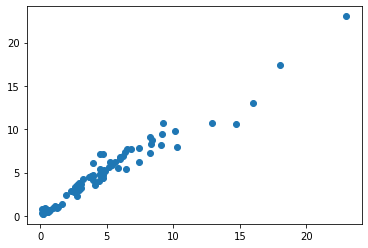

In [119]:
plt.scatter(Y_test, predictions)

In [122]:
from sklearn import metrics

In [124]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.6062732825983188
MSE: 0.8637106866780694
RMSE: 0.9293603642710773


In [125]:
import pickle

Pickle_file = open('Random_Forest_model.pkl', 'wb')
pickle.dump(rf_random, Pickle_file)